In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col= 0)

In [4]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

In [5]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [6]:
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [7]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg']

I want to choose a dataset from the filtered one ( z score etc. ) and then do these correlation thingies for the numeric data. 

In [9]:
identifier_columns = ['Country','ASBH02A','avgscore']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [10]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

In [13]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()

In [15]:
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore_binned', value_name='count')

In [18]:
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

In [19]:
# Calculate total counts for 'No' and 'Yes'
total_no = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'No']['count'].sum()
total_yes = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'Yes']['count'].sum()

# Calculate the percentage
contingency_table_melted['percentage'] = contingency_table_melted.apply(lambda row: (row['count'] / total_no * 100) if row['ASBH02A'] == 'No' else (row['count'] / total_yes * 100), axis=1)

In [20]:
# Convert avgscore_binned to categorical with the specified order
contingency_table_melted['avgscore_binned'] = pd.Categorical(contingency_table_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

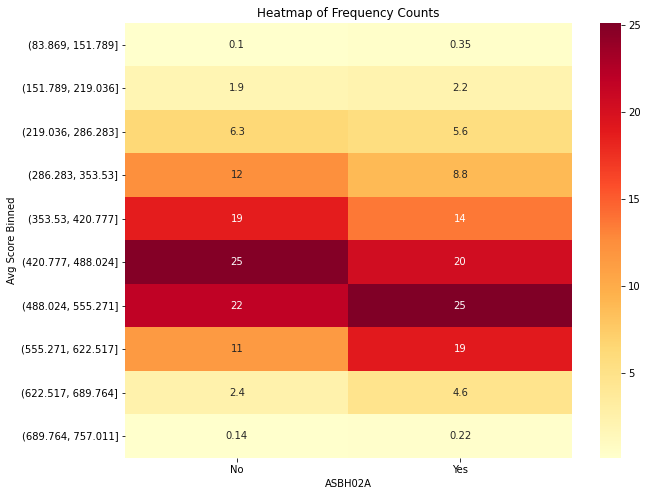

In [22]:
# Assuming contingency_table_melted is your DataFrame
# You might need to pivot the DataFrame to create a matrix for the heatmap
## index, column, values
heatmap_data = contingency_table_melted.pivot(index = "avgscore_binned", columns = "ASBH02A", values = "percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

## Now I will compare by country.

In [23]:
# Create a contingency table
contingency_table2 = pd.crosstab(index = [df['ASBH02A'], df['Country']],columns=df['avgscore_binned'])

In [24]:
# Convert the contingency table to a format suitable for Plotly
contingency_table2_reset = contingency_table2.reset_index()
contingency_table2_melted = contingency_table2_reset.melt(id_vars=['ASBH02A','Country'], var_name='avgscore_binned', value_name='count')
# Convert Interval objects to strings
contingency_table2_melted['avgscore_binned'] = contingency_table2_melted['avgscore_binned'].astype(str)

In [25]:
df_yes = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'Yes']

In [26]:
df_yes

,ASBH02A,Country,avgscore_binned,count
9,Yes,Austria,"(83.869, 151.789]",0
10,Yes,Egypt,"(83.869, 151.789]",50
11,Yes,France,"(83.869, 151.789]",0
12,Yes,Germany,"(83.869, 151.789]",0
13,Yes,Iran,"(83.869, 151.789]",21
14,Yes,Jordan,"(83.869, 151.789]",64
15,Yes,Netherlands,"(83.869, 151.789]",0
16,Yes,Sweden,"(83.869, 151.789]",0
17,Yes,Turkey,"(83.869, 151.789]",0
27,Yes,Austria,"(151.789, 219.036]",0


In [27]:
heatmap_yes = df_yes.pivot(index='Country',columns="avgscore_binned",values = "count")

In [28]:
heatmap_yes["total"]= heatmap_yes.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_yes = heatmap_yes['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_yes = heatmap_yes.div(total_column_yes, axis=0) * 100
df_percentage_yes = df_percentage_yes.drop("total", axis = 1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_yes_reset = df_percentage_yes.reset_index()
df_percentage__yes_melted = df_percentage_yes_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')

In [29]:
# Convert Interval objects to strings
df_percentage__yes_melted['avgscore_binned'] = df_percentage__yes_melted['avgscore_binned'].astype(str)

In [30]:
# Convert avgscore_binned to categorical with the specified order
df_percentage__yes_melted['avgscore_binned'] = pd.Categorical(df_percentage__yes_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

In [31]:
heatmap_percent_yes = df_percentage__yes_melted.pivot(index = "avgscore_binned", columns = "Country", values = "percentage")

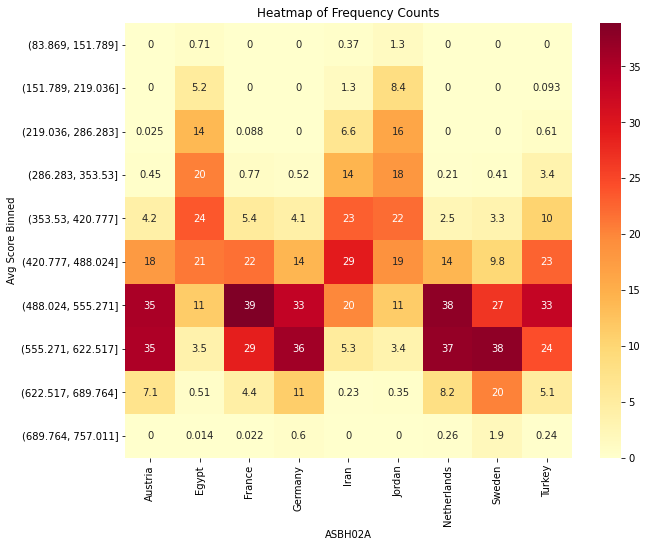

In [32]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_yes, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()

In [33]:
df_no = contingency_table2_melted[contingency_table2_melted['ASBH02A'] == 'No']
df_no= df_no.drop('ASBH02A', axis=1)
heatmap_no = df_no.pivot(index='Country',columns="avgscore_binned",values = "count")

In [34]:
heatmap_no["total"] = heatmap_no.sum(axis=1)
# Assuming your DataFrame is named df
# Copy the total column to a variable, we'll use it for division later
total_column_no = heatmap_no['total']

# Dividing all columns except the 'total' column by the 'total' column of that row
df_percentage_no = heatmap_no.div(total_column_no, axis=0) * 100
df_percentage_no = df_percentage_no.drop("total", axis=1)
# Convert the contingency table to a format suitable for Plotly
df_percentage_no_reset = df_percentage_no.reset_index()
df_percentage_no_melted = df_percentage_no_reset.melt(id_vars='Country', var_name='avgscore_binned', value_name='percentage')


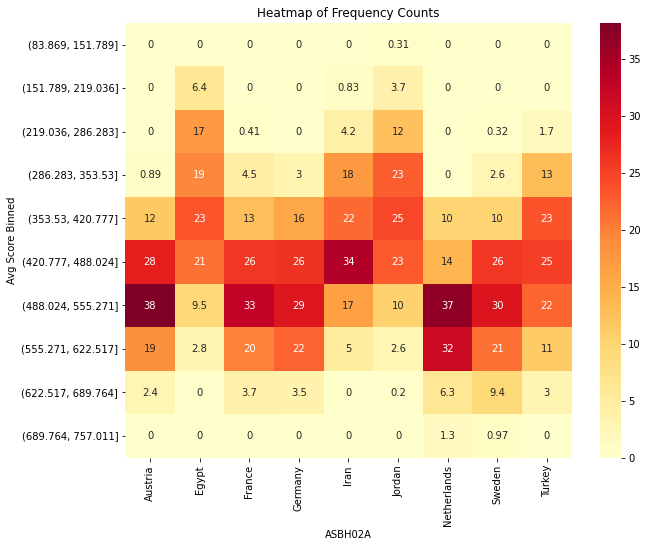

In [35]:
# Convert Interval objects to strings
df_percentage_no_melted['avgscore_binned'] = df_percentage_no_melted['avgscore_binned'].astype(str)

# Convert avgscore_binned to categorical with the specified order
df_percentage_no_melted['avgscore_binned'] = pd.Categorical(df_percentage_no_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

heatmap_percent_no = df_percentage_no_melted.pivot(index="avgscore_binned", columns="Country", values="percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_percent_no, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()


## Now let's plot the two on the same figure to compare

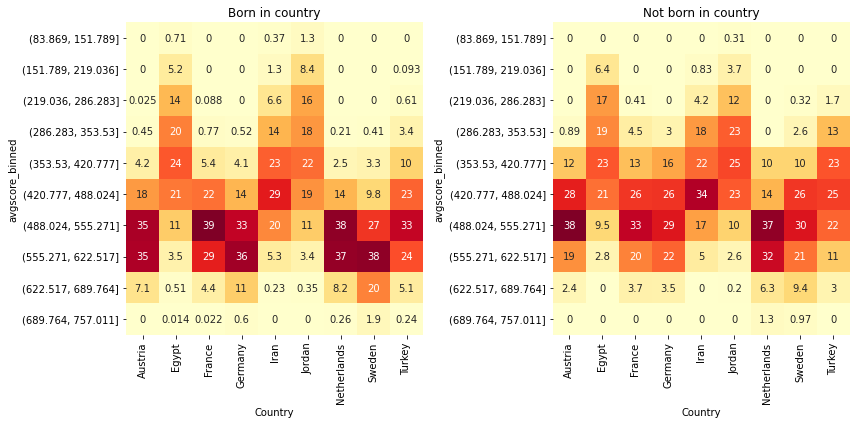

In [36]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_percent_yes, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_percent_no, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='avgscore_binned'>

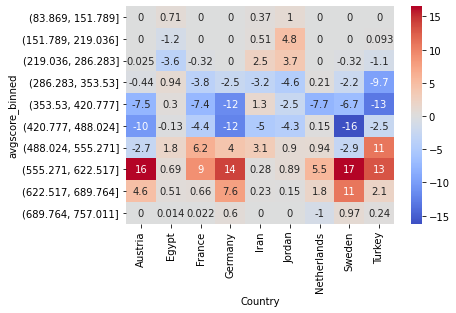

In [37]:
diff_data = heatmap_percent_yes - heatmap_percent_no

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

Can also now split the dataframes into countries and plot the countries side by side.